In [52]:
! pip install qeds
import pandas as pd
import qeds
%matplotlib inline
import qeds
qeds.themes.mpl_style();
from IPython.display import display

# Merge - Exercises

## Exercises 1-3

**For these exercises we use several DataFrames:**
- WDI data on GDP components
- population
- square miles of countries  

In [53]:
# from WDI. Units trillions of 2010 USD
url = "https://datascience.quantecon.org/assets/data/wdi_data.csv"
wdi = pd.read_csv(url).set_index(["country", "year"])
#we create a DataFrame corresponding to 2017 that we need later on
wdi2017 = wdi.xs(2017, level="year")

In [54]:
# Data from https://www.nationmaster.com/country-info/stats/Geography/Land-area/Square-miles
# units -- millions of square miles
sq_miles = pd.Series({
   "United States": 3.8,
   "Canada": 3.8,
   "Germany": 0.137,
   "United Kingdom": 0.0936,
   "Russia": 6.6,
}, name="sq_miles").to_frame()
sq_miles.index.name = "country"

In [55]:
# from WDI. Units millions of people
pop_url = "https://datascience.quantecon.org/assets/data/wdi_population.csv"
pop = pd.read_csv(pop_url).set_index(["country", "year"])

## Exercise 1

**Use your new `merge` skills to answer the final question from above: What is the population density of each country? How much does it change over time?**

In [56]:
#we first merge the DataFrames that allow us to compute the population density, namely pop and sq_miles
sqm_pop = pop.join(sq_miles, on='country')
sqm_pop.head()

Population  sq_miles
country year                      
Canada  2017   36.540268       3.8
        2016   36.109487       3.8
        2015   35.702908       3.8
        2014   35.437435       3.8
        2013   35.082954       3.8

In [57]:
# we next compute the population density of each country as Population/sq_miles
    # and store it in a new column called "density"
sqm_pop["density"] = sqm_pop["Population"] / sqm_pop["sq_miles"]
sqm_pop.head()

Population  sq_miles   density
country year                                
Canada  2017   36.540268       3.8  9.615860
        2016   36.109487       3.8  9.502497
        2015   35.702908       3.8  9.395502
        2014   35.437435       3.8  9.325641
        2013   35.082954       3.8  9.232356

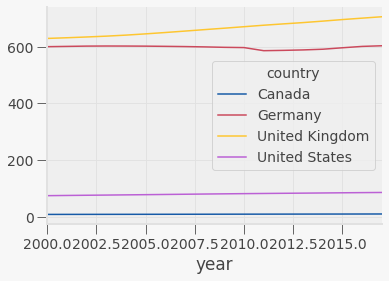

In [58]:
# finally, we plot the time series of population density for each country
    
sqm_pop=sqm_pop.sort_index()
sqm_pop.head()
sqm_pop['density'].unstack(level=0).plot()

## Exercise 2

1. **Create two new DataFrames:**

    - wdi2017_no_US, which excludes the United States
    - sq_miles_no_germant, which excludes Germany

    **Compare the `how="left"` with `how="inner"` options using the DataFrames `wdi2017_no_US` and `sq_miles_no_germany`. Are they different? How?**

In [59]:
# We create the two DataFrames
wdi2017_no_US = wdi2017.drop("United States")
print("This is wdi2017_no_US")
display(wdi2017_no_US)

sq_miles_no_germany = sq_miles.drop("Germany")
print("This is sq_miles_no_germany")
display(sq_miles_no_germany)

This is wdi2017_no_US


,GovExpend,Consumption,Exports,Imports,GDP
country,,,,,
Canada,0.372665,1.095475,0.582831,0.600031,1.868164
Germany,0.745579,2.112009,1.930563,1.666348,3.883870
United Kingdom,0.549538,1.809154,0.862629,0.933145,2.818704


This is sq_miles_no_germany


,sq_miles
country,
United States,3.8000
Canada,3.8000
United Kingdom,0.0936
Russia,6.6000


In [60]:
req1 = pd.merge(wdi2017_no_US, sq_miles_no_germany, on="country", how="left")
print("This is how=\"left\"")
display(req1)

req2 = pd.merge(wdi2017_no_US, sq_miles_no_germany, on="country", how="inner")
print("This is how=\"inner\"")
display(req2)

This is how="left"


,GovExpend,Consumption,Exports,Imports,GDP,sq_miles
country,,,,,,
Canada,0.372665,1.095475,0.582831,0.600031,1.868164,3.8000
Germany,0.745579,2.112009,1.930563,1.666348,3.883870,NaN
United Kingdom,0.549538,1.809154,0.862629,0.933145,2.818704,0.0936


This is how="inner"


,GovExpend,Consumption,Exports,Imports,GDP,sq_miles
country,,,,,,
Canada,0.372665,1.095475,0.582831,0.600031,1.868164,3.8000
United Kingdom,0.549538,1.809154,0.862629,0.933145,2.818704,0.0936


In [61]:
# the how="left" version includes the countries that are common to both DataFrames (Canada & UK),
    # plus the countries that are included in the left DataFrame (wdi2017_no_US) such as Germany, 
        # but not in the right DataFrame (sq_miles_no_germany)
    
# the how="inner" version includes only the countries that are common to both DataFrames (Canada & UK)  

2. **Will this happen for all pairs of DataFrames, or are `wdi2017_no_US` and `sq_miles_no_germany` special in some way?**

As explained earlier: 
- with the 'left' method, the result contains all the keys from the left ("base", here wdi2017_no_US) dataframe. This implies that, for the keys (here, countries) that exist on the left dataframe but not on the right dataframe, the "new column" (here sq_miles) while be NaN.
    - Here, the result has all the country because the wdi2017_no_US has all the country. But, since sq_miles does not have an entry for germany, the result returns NaN in the corresponding cell. 
- With the 'inner' method, the result containts only the keys that exist in both the left ("base", here wdi2017_no_US) and right (here sq_miles) dataframe. 
    - Here, the wdi_2017_no_US does have the US and the sq_miles dataframe doesn't have germany so the resulting dataframe have neither

3. **Also compare `how="right"` and `how="outer"` and answer the same questions.**

In [62]:
req1bis = pd.merge(wdi2017_no_US, sq_miles_no_germany, on="country", how="right")
print("This is how=\"right\"")
display(req1bis)

req2bis = pd.merge(wdi2017_no_US, sq_miles_no_germany, on="country", how="outer")
print("This is how=\"outer\"")
display(req2bis)

This is how="right"


,GovExpend,Consumption,Exports,Imports,GDP,sq_miles
country,,,,,,
Canada,0.372665,1.095475,0.582831,0.600031,1.868164,3.8000
United Kingdom,0.549538,1.809154,0.862629,0.933145,2.818704,0.0936
United States,NaN,NaN,NaN,NaN,NaN,3.8000
Russia,NaN,NaN,NaN,NaN,NaN,6.6000


This is how="outer"


,GovExpend,Consumption,Exports,Imports,GDP,sq_miles
country,,,,,,
Canada,0.372665,1.095475,0.582831,0.600031,1.868164,3.8000
Germany,0.745579,2.112009,1.930563,1.666348,3.883870,NaN
United Kingdom,0.549538,1.809154,0.862629,0.933145,2.818704,0.0936
United States,NaN,NaN,NaN,NaN,NaN,3.8000
Russia,NaN,NaN,NaN,NaN,NaN,6.6000


In [63]:
# the how="right" version includes the countries that are common to both DataFrames (Canada & UK),
    # plus the countries that are included in the right DataFrame (sq_miles_no_germany) such as US & Russia, 
        # but not in the left DataFrame (wdi2017_no_us)
    
# the how="outer" version includes all the countries from both DataFrames (Canada, Germany, UK, US, Russia)  

## Exercise 3

**Can you pick the correct argument for `how` such that `pd.merge(wdi2017, sq_miles, how="left")` is equal to `pd.merge(sq_miles, wdi2017, how=XXX)`?**

In [64]:
#first, we check how pd.merge(wdi2017, sq_miles, on="country", how="left") looks like
pd.merge(wdi2017, sq_miles, on="country", how="left")

#the version below is more elegant as it sorts values and orders columns
    #merged1 = pd.DataFrame(pd.merge(wdi2017, sq_miles, on="country", how="left").sort_values("country", axis = 0) , 
    #                      columns=["GovExpend", "Consumption", "Exports", "Imports", "GDP", "sq_miles"])
    #merged1

,GovExpend,Consumption,Exports,Imports,GDP,sq_miles
country,,,,,,
Canada,0.372665,1.095475,0.582831,0.600031,1.868164,3.8000
Germany,0.745579,2.112009,1.930563,1.666348,3.883870,0.1370
United Kingdom,0.549538,1.809154,0.862629,0.933145,2.818704,0.0936
United States,2.405743,12.019266,2.287071,3.069954,17.348627,3.8000


In [65]:
#second, we find the right "how"
pd.merge(sq_miles, wdi2017, on="country" , how="right")

#the version below is more elegant as it sorts values and orders columns and gives the exact same DataFrame in visual terms
    #merged2 = pd.DataFrame(pd.merge(wdi2017, sq_miles, on="country", how="right").sort_values("country", axis = 0) , 
    #                      columns=["GovExpend", "Consumption", "Exports", "Imports", "GDP", "sq_miles"])
    #merged2

,sq_miles,GovExpend,Consumption,Exports,Imports,GDP
country,,,,,,
United States,3.8000,2.405743,12.019266,2.287071,3.069954,17.348627
Canada,3.8000,0.372665,1.095475,0.582831,0.600031,1.868164
Germany,0.1370,0.745579,2.112009,1.930563,1.666348,3.883870
United Kingdom,0.0936,0.549538,1.809154,0.862629,0.933145,2.818704


It is a matter of keys ! 
- In the first proposed code, we want all the keys from the left dataframe, ie all the countries (keys) in wdi2017.
- To have the same dataframe in the second case, we want to have the same keys as in the previous dataframe, i.e. the countries in wdi2017. In this case, wdi2017 is the "on the right" (it is the dataframe that we put onto the base one) so we chose, thanks to how='right', to have the keys from the right.

## Exercise 4

**For this exercise we use a dataset containing ratings of books from the website [Goodreads](https://www.goodreads.com/) and a dataset containing information on the actual books, that we are going to merge.**

In [66]:
#dataset containing ratings of books from the website [Goodreads]
ratings = qeds.data.load("goodreads_ratings")

In [67]:
#dataset containing information on the actual books
books = qeds.data.load("goodreads_books")
# we only need a few of the columns
books = books[["book_id", "authors", "title"]]

In [68]:
#merged dataset
rated_books = pd.merge(ratings, books)

1. **Determine the average rating for the books with the *most*/*least* number ratings.**

In [69]:
#most rated
most_rated_books_id = rated_books["book_id"].value_counts().nlargest(10).index
most_rated_books = rated_books.loc[rated_books["book_id"].isin(most_rated_books_id), :]
list(most_rated_books["title"].unique())

['Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)',
 "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",
 'Harry Potter and the Chamber of Secrets (Harry Potter, #2)',
 'The Great Gatsby',
 'To Kill a Mockingbird',
 'The Hobbit',
 'Twilight (Twilight, #1)',
 'The Hunger Games (The Hunger Games, #1)',
 'Catching Fire (The Hunger Games, #2)',
 'Mockingjay (The Hunger Games, #3)']

In [70]:
#least rated
least_rated_books_id = rated_books["book_id"].value_counts().nsmallest(10).index
least_rated_books = rated_books.loc[rated_books["book_id"].isin(least_rated_books_id), :]
list(least_rated_books["title"].unique())

['The Batman Chronicles, Vol. 1',
 "The King's Agent",
 'The Magic (The Secret, #3)',
 'Fifty Shades Duo: Fifty Shades Darker / Fifty Shades Freed (Fifty Shades, #2-3)',
 'The Lake (The Lake Trilogy #1)',
 'Diary ng Panget',
 "Kindle Paperwhite User's Guide",
 "Kindle User's Guide",
 'Attack on Titan: No Regrets, Volume 01',
 'Manga Classics: Les Misérables']

2. **Is there a distinguishable difference in the average rating compared to the most rated books?**

In [71]:
least=least_rated_books.pivot_table(values="rating", index="title")
most=most_rated_books.pivot_table(values="rating", index="title")

In [72]:
display(least)
display(most)

,rating
title,
"Attack on Titan: No Regrets, Volume 01",4.292683
Diary ng Panget,3.545455
"Fifty Shades Duo: Fifty Shades Darker / Fifty Shades Freed (Fifty Shades, #2-3)",4.041667
Kindle Paperwhite User's Guide,3.757576
Kindle User's Guide,3.375000
Manga Classics: Les Misérables,4.187500
"The Batman Chronicles, Vol. 1",3.822222
The King's Agent,3.722222
The Lake (The Lake Trilogy #1),2.960000


,rating
title,
"Catching Fire (The Hunger Games, #2)",4.133422
"Harry Potter and the Chamber of Secrets (Harry Potter, #2)",4.229418
"Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)",4.418732
"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",4.351350
"Mockingjay (The Hunger Games, #3)",3.853131
The Great Gatsby,3.772224
The Hobbit,4.148477
"The Hunger Games (The Hunger Games, #1)",4.279707
To Kill a Mockingbird,4.329369


In [73]:
# To decide whether they are really different, a small ttest, underpowered and with no care for the hypothesis ^^

import scipy.stats as stats
stats.ttest_ind(least['rating'], most['rating'])

Ttest_indResult(statistic=-1.7299828900907714, pvalue=0.1007424590612311)

## Exercises 5-7

**For these exercises we create the DataFrames dfL and dfR, as specified below:**

In [74]:
dfL = pd.DataFrame(
    {"Key": ["A", "B", "A", "C"], "C1":[1, 2, 3, 4], "C2": [10, 20, 30, 40]},
    index=["L1", "L2", "L3", "L4"]
)[["Key", "C1", "C2"]]
print("This is dfL.")
display(dfL)

dfR = pd.DataFrame(
    {"Key": ["A", "B", "C", "D"], "C3": [100, 200, 300, 400]},
    index=["R1", "R2", "R3", "R4"]
)[["Key", "C3"]]
print("This is dfR.")
display(dfR)

This is dfL.


,Key,C1,C2
L1,A,1,10
L2,B,2,20
L3,A,3,30
L4,C,4,40


This is dfR.


,Key,C3
R1,A,100
R2,B,200
R3,C,300
R4,D,400


## Exercise 5

**In writing, describe what the output looks like when you do `pd.concat([dfL, dfR], axis=1)` (see above and/or run the cell below). Be sure to describe things like:**

- What are the columns? What about columns with the same name?  
- What is the index?  
- Do any `NaN`s get introduced? If so, where? Why?  

In [75]:
pd.concat([dfL, dfR], axis=1)

#pd.concat([dfL, dfR], axis=1).info()

#the columns are Key, C1, C2, Key, C3 (since Key is defined as a column and not as an index in both DataFrames, we end up with two columns Key)
#the index goes through 8 entries: L1 - L4, R1 - R4
#missing values for:
    #L rows corresponding to columns Key and C3 (because the L rows do not exist in dfR)
    #R rows corresponding to columns Key, C1 and C2 (because the R rows do not exist in dfL)
#while axis = 1 arranges the DataFrames side-by-side, the fact that there are no common values for the index leads to a DataFrame like this

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Key,C1,C2,Key,C3
L1,A,1.0,10.0,NaN,NaN
L2,B,2.0,20.0,NaN,NaN
L3,A,3.0,30.0,NaN,NaN
L4,C,4.0,40.0,NaN,NaN
R1,NaN,NaN,NaN,A,100.0
R2,NaN,NaN,NaN,B,200.0
R3,NaN,NaN,NaN,C,300.0
R4,NaN,NaN,NaN,D,400.0


## Exercise 6

**Determine what happens when you run each of the two cells below. For each cell, answer the list of questions from the previous exercise.**

In [76]:
# First code cell for above exercise
pd.concat([dfL, dfL], axis=0)
#pd.concat([dfL, dfL], axis=0).info()

#the columns are Key, C1, C2
#the index goes through 4 entries: L1 to L4
#we don' have any missing values, because the Dataframes have identical structures
#since we used axis = 0, the DataFrames are arranged on top of one another

,Key,C1,C2
L1,A,1,10
L2,B,2,20
L3,A,3,30
L4,C,4,40
L1,A,1,10
L2,B,2,20
L3,A,3,30
L4,C,4,40


In [77]:
# Second code cell for above exercise
pd.concat([dfR, dfR], axis=1)
#pd.concat([dfR, dfR], axis=1).info()

#the columns are Key, C3
#the index goes through 4 entries: R1 to R4
#we don' have any missing values, because the Dataframes have identical structures
#since we used axis = 1, the DataFrames are arranged side-by-side

,Key,C3,Key,C3
R1,A,100,A,100
R2,B,200,B,200
R3,C,300,C,300
R4,D,400,D,400


## Exercise 7

**Describe in words why the output of `pd.merge(dfL, dfR, how="right")` has more rows than either `dfL` or `dfR`. Run the cell below to see the output of that operation.**

In [78]:
# the output of pd.merge(dfL, dfR, how="right") has more rows than either dfL and dfR because, 
    # besides the information common to both DataFrames (A, B, C), 
    # it includes information that is in dfR and not in dfL (D)
    # Note: all elements from dfL are in dfR, but A appears twice in dfL, which means that the merged DataFrame will include A twice, plus B, plus C, plus D
 
merged=pd.merge(dfL, dfR, how="right")
print("This is merged:")
display(merged)

print("This is dfL:")
display(dfL)

print("This is dfR:")
display(dfR)

This is merged:


,Key,C1,C2,C3
0,A,1.0,10.0,100
1,A,3.0,30.0,100
2,B,2.0,20.0,200
3,C,4.0,40.0,300
4,D,NaN,NaN,400


This is dfL:


,Key,C1,C2
L1,A,1,10
L2,B,2,20
L3,A,3,30
L4,C,4,40


This is dfR:


,Key,C3
R1,A,100
R2,B,200
R3,C,300
R4,D,400
